## Setting up the environment

In [1]:
import numpy as np 
import pandas as pd
import string

import matplotlib.pyplot as plt 
import seaborn as sns 

import ipywidgets
from ipywidgets import interact

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

## Understanding the dataset

In [2]:
# reading the dataset
data = pd.read_csv('./dataset/drug.csv')

# Lets print the shape of the dataset
print('The shape of the dataset :', data.shape)

The shape of the dataset : (161297, 7)


In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


1. <b>uniqueID</b>: Used to identifying all the Records in the Data uniquely <br>
2. <b>drugName</b>: Consists of the name of the drugs on which the consumers have given certain ratings and reviews. <br>
3. <b>condition</b>: Tells us about the medical condition for which the given drug is used. <br>
4. <b>review and rating</b>: Which is collected by patients after they have used that particular drug for their medical condition.<br>
5. <b>date</b>: Tells us that on which date the review and rating was collected by the patient.<br>
6. <b>usefulCount</b>: Gives us the information about the number of people who found a drug useful for their specified medical condition. <br>


The <b>usefulCount</b> column is the most important column as this gives a lot of confidence to the people for trusting on a drug for any specified medical condition. 


## Lets Explore some of the important column in the dataset

In [4]:
print("Number of the unique drugs present in the dataset :", data['drugName'].nunique())
print('Number of the unique medical conditions presents in the dataset:', data['condition'].nunique())

print('\nThe time period of collecting the Data')
print('Starting date:', data['date'].min())
print('Ending date:', data['date'].max())

Number of the unique drugs present in the dataset : 3436
Number of the unique medical conditions presents in the dataset: 884

The time period of collecting the Data
Starting date: 1-Apr-08
Ending date: 9-Sep-17


## Understanding the problem

1. Suppose there is a pharmaceutical startup that was recently acquired by one of the world's largest MNCs.
2. For the acquisition process, the startup is required to tabulate all drugs that they have sold and account for each drug's effectiveness.
3. Dataset contains info such as Drug's Name, reviews by customers, popularity and use case of the drug. 

### Task of the project

1. Provide a sophisticated and useful model using different NLP or ML techniques.
2. Find out the most useful drugs for each condition.
3. Find out some of the hidden trends or patterns that could help the company to make precise data driven decisions. 

## Summarizing the dataset

In [5]:
data[['drugName', 'condition', 'review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


## Lets check for the missing values 

In [6]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [7]:
# as we know that condition is an important column, so we will delete all the records where condition are missing\

data = data.dropna()

# lets check the missing value now 

data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

## Unveiling Hidden Patterns from the dataset

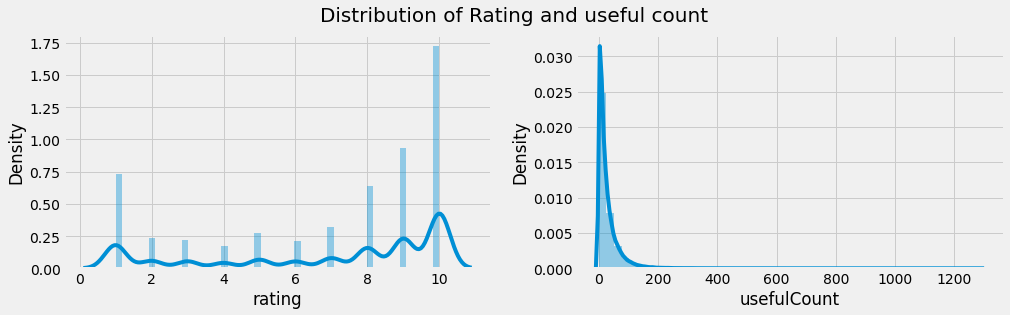

In [8]:
# Lets check the Distribution of Rating and Useful Count 

plt.rcParams['figure.figsize'] = (15, 4)
plt.subplot(1, 2, 1)
sns.distplot(data['rating'])


plt.subplot(1, 2, 2)
sns.distplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and useful count \n', fontsize = 20)
plt.show()

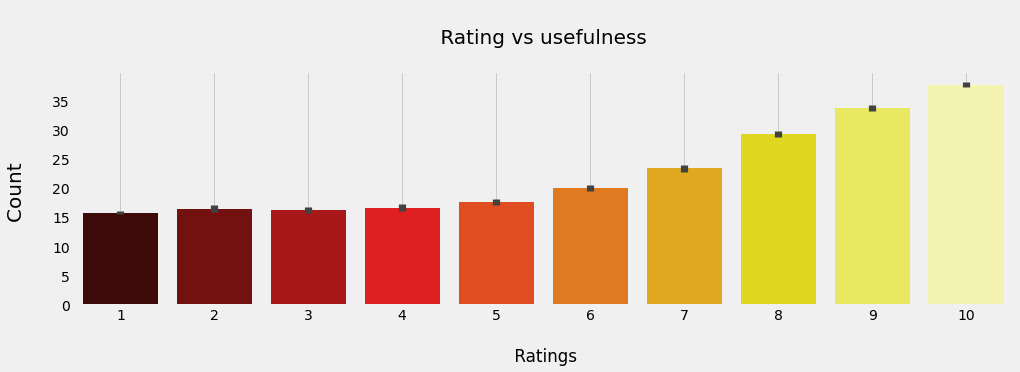

In [9]:
# Lets check the impact of rating on usefulness

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count \n', fontsize = 20)
plt.title('\n Rating vs usefulness \n', fontsize = 20)
plt.show()

In [10]:
# Check whether length of Review has any impact on Rating of the Drugs

# for what we need to create a new column to calculate length of the reviews

data['length'] = data['review'].apply(len)

In [11]:
# lets check the impact of length of reviews on Ratings

data[['rating', 'length']].groupby(['rating']).agg(['min', 'mean', 'max'])

length                   
          min        mean    max
rating                          
1           5  428.784505   3692
2           9  452.902893  10787
3           8  461.249961   5112
4           7  464.077912   3030
5           6  477.982661   2048
6           4  467.957150   2202
7           6  485.597765   3063
8           3  483.584163   4087
9           3  477.696117   6182
10          3  443.215923   6192

In [12]:
# Lets Check the Highest Length review

print('Length of Longest Review', data['length'].max())
data['review'][data['length'] == data['length'].max()].iloc[0]

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

## Cleaning the Reviews

The review consist of so many unnecessay things, such as punctuations, numbers and stop words. It is very important to remove these kind of impurities and unnecessary things from the data so that we can easily perform textual analysis as we know that punctuations and numbers have no sentimental meaning. So, removing them can be a good move. Now if you do not know about the stop word the stop word. 

Let me tell you that stop words are those words which have no sentimental meaning, such as he/she, us, me, you, her, they, there etc. 

I hope you got the understanding of the concepts of removing unnecessay things from our data. 

In [13]:
# First lets remove Punctuations from the reviews

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/linus/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Now Lets Remove the stopwords also

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop:
    new_item = punctuation_removal(item)
    stop_words.append(new_item)
    
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str
           if word.lower() not in stop_words]

data['review'] = data['review'].apply(stopwords_removal)

In [16]:
# Lets remove the Number also

import re

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('/d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers)

In [17]:
# Lets calculate the sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid  = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data = train_sentiments)

In [18]:
# Lets check impact of sentiment on Reviews

data[['rating', 'sentiment']].groupby(['rating']).agg(['min', 'mean', 'max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9931  0.005596  0.9898
2        -0.9929  0.004849  0.9924
3        -0.9925  0.004424  0.9877
4        -0.9919  0.000714  0.9867
5        -0.9920  0.014982  0.9882
6        -0.9914  0.008340  0.9936
7        -0.9938  0.000735  0.9911
8        -0.9936  0.009858  0.9923
9        -0.9964  0.009865  0.9911
10       -0.9982  0.005863  0.9923

In [19]:
# as we can see that sentiment and length of the review are not related to Reviews.

# Lets drop all the unncessary column from dataset
data = data.drop(['date', 'uniqueID', 'sentiment', 'review', 'length'], axis = 1)

# Lets check the name of columns now
data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

## Calculating Effectiveness and Usefulness of Drugs

In [20]:
# Lets Calculate an Effective Rating

min_rating = data['rating'].min()
max_rating = data['rating'].max()

In [21]:
def scale_rating(rating):
    rating -= min_rating
    rating = rating / (max_rating - 1)
    rating *= 5
    rating = int(round(rating, 0))
    
    if (int(rating) == 0 or int(rating) == 1 or int(rating) == 2):
        return 0
    else:
        return 1
data['eff_score'] = data['rating'].apply(scale_rating)

In [22]:
# Lets also calculate Usefulness score

data['usefulness'] = data['rating'] * data['usefulCount']*data['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Conditions
data[['drugName','condition','usefulness']][data['usefulness'] > 
                            data['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


## Analyzing the Medical Condtitions

In [23]:
# lets calculate the Number of Useless and Useful Drugs for Each Condition

@interact
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

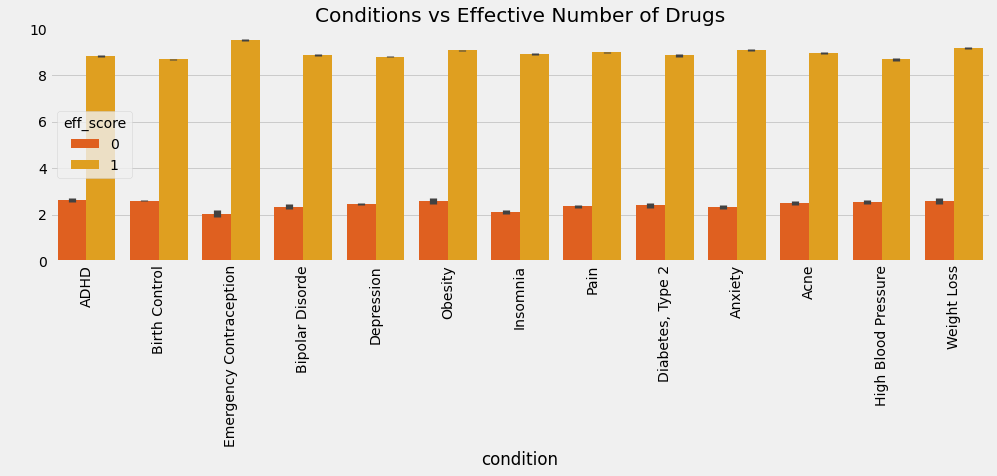

In [24]:
# lets check this in Graph, 

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = data['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [25]:
# lets check the Most Common Conditions

print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [26]:
# lets check Drugs, which were useful to Highest Number of Poeple
data[['drugName','usefulCount']][data['usefulCount'] >
                    data['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


## Finding Most Useful and Useless Drugs for each Condition

In [27]:
# lets remove all the Duplicates from the Dataset
data = data.drop_duplicates()

In [28]:
# lets find the Highest and Lowest Rated Drugs for each Condition

@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…